In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score 
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

In [2]:
tds = pd.read_csv('titanic.csv')

In [ ]:
tds.head()

In [3]:
tds.set_index('PassengerId', inplace = True)
tds

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
tds.info()

In [ ]:
tds.describe()

Text(0.5, 1.0, 'Missing values heatmap')

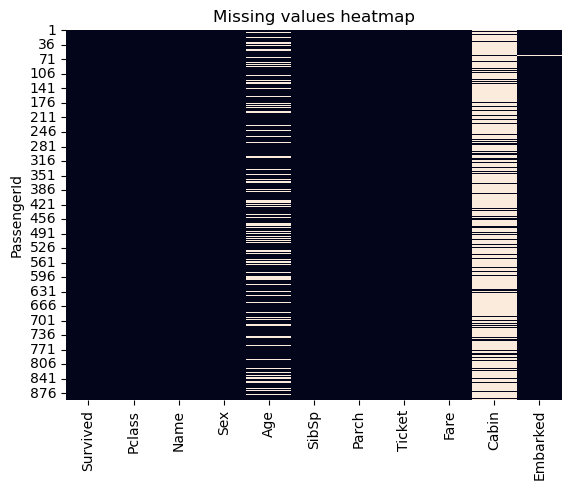

In [4]:
sns.heatmap(tds.isnull(), cbar = False).set_title("Missing values heatmap")

In [ ]:
tds.nunique()

Text(0.5, 1.0, 'Percentage of people survived and Deceased')

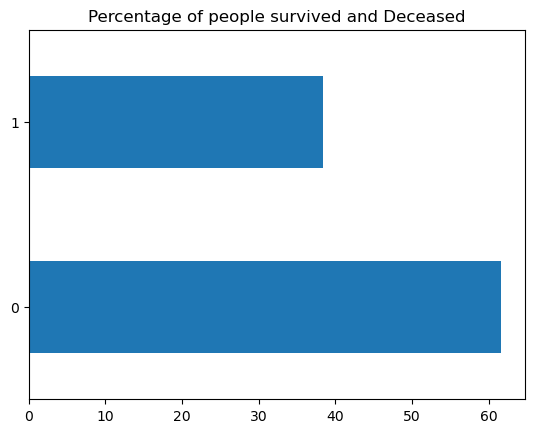

In [5]:
(tds.Survived.value_counts(normalize=True) * 100).plot.barh().set_title("Percentage of people survived and Deceased")

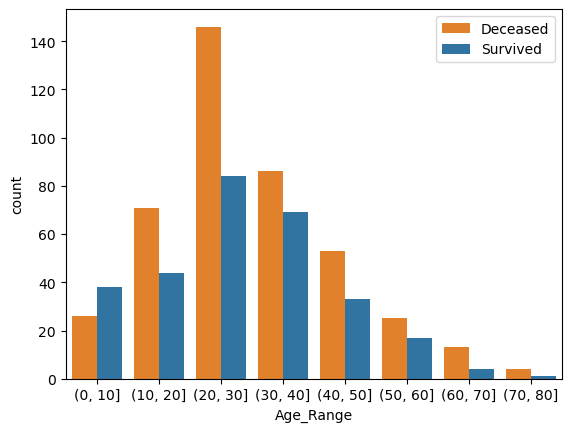

In [6]:
tds['Age_Range'] = pd.cut(tds.Age, [0, 10, 20, 30, 40, 50, 60,70,80])
sns.countplot(x = "Age_Range", hue = "Survived", data = tds, palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])

In [7]:
tds['Family'] = tds.Parch + tds.SibSp + 1
tds

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range,Family
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20.0, 30.0]",2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30.0, 40.0]",2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20.0, 30.0]",1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30.0, 40.0]",2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30.0, 40.0]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(20.0, 30.0]",1
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(10.0, 20.0]",1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,4


In [8]:
tds['Fare_bin'] = pd.cut(tds['Fare'], bins=[0,7.91,14.45,31,120], labels=['low_fare','med_fare',
                                                                                      'highmed_fare','high_fare'])

In [17]:
tds["Age_temp"] = tds["Age"].dropna(axis = 0)
tds.Age_temp.unique()
#tds['Age_bin'] = pd.cut(tds['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [ ]:
p = sns.countplot(x = "Embarked", hue = "Survived", data = tds, palette=["C1", "C0"])
p.set_xticklabels(["Southampton","Cherbourg","Queenstown"])
p.legend(labels = ["Deceased", "Survived"])
p.set_title("Survival based on embarking point")

Text(0.5, 1.0, 'Fare based on embarking point')

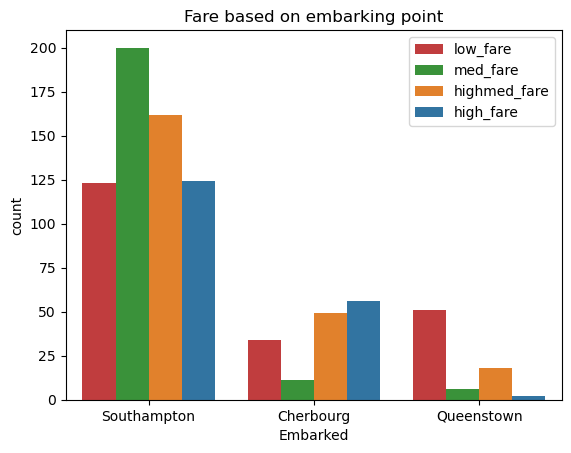

In [14]:
p = sns.countplot(x = "Embarked", hue = "Fare_bin", data = tds, palette=["C3", "C2", "C1", "C0"])
p.set_xticklabels(["Southampton","Cherbourg","Queenstown"])
p.legend(labels = ["low_fare", "med_fare", "highmed_fare", "high_fare"])
p.set_title("Fare based on embarking point")

In [ ]:
tds['Title'] = tds.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

tds['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], ['Rare', 'Rare','Rare','Rare','Rare','Rare','Rare','Rare','Rare','Rare','Rare'], inplace = True)
tds['Title'].replace(['Mlle'], ['Miss'], inplace = True)
tds['Title'].replace(['Ms'], ['Miss'], inplace = True)
tds['Title'].replace(['Mme'], ['Mrs'], inplace = True)

tds.Title.value_counts()

In [ ]:
tds = pd.get_dummies(tds, columns = ["Embarked"], prefix = "Embd", drop_first = True, dtype = int)
tds["Sex"].replace(["male", "female"], [0, 1], inplace = True)

In [ ]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)
    


for dataset in tds:
    dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])
    


In [ ]:
tds.Embarked.fillna(tds.Embarked.mode()[0], inplace = True)
sns.heatmap(tds.isnull(), cbar = False).set_title("Heatmap after filling values")

In [ ]:
tds.nunique()

In [ ]:
tds.describe()

In [ ]:
mn = tds.Age.min()
mx = tds.Age.max()
tds["Age"] = (tds["Age"] - mn)/(mx - mn)

mn = tds.Fare.min()
mx = tds.Fare.max()
tds["Fare"] = (tds["Fare"] - mn)/(mx - mn)

mn = tds.Family.min()
mx = tds.Family.max()
tds["Family"] = (tds["Family"] - mn)/(mx - mn)

mn = tds.Pclass.min()
mx = tds.Pclass.max()
tds["Pclass"] = (tds["Pclass"] - mn)/(mx - mn)

In [ ]:
tds.describe()

In [ ]:
tds

In [ ]:
tds = tds.drop(["Pclass", "Name", "SibSp", "Parch", "Ticket", "Cabin", "Title"], axis = 1)
tds

In [ ]:
x = tds.iloc[:, :]
x.drop(["Survived"], inplace = True, axis = 1)
x.insert(0, 'X0', 1)
y = tds.iloc[:, 1]
x = x.to_numpy()
y = y.to_numpy()
type(x), type(y)

In [ ]:
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.2, random_state = 42)
x_train, x_val, y_train, y_val = tts(x_train, y_train, test_size = 0.25, random_state = 42)

def compute_cost(W, X, Y):
    N = X.shape[0]
    distances = 1 - Y * (np.dot(X, W))
    distances[distances < 0] = 0
    hinge_loss = reg_strength * (np.sum(distances) / N)

    cost = 1 / 2 * np.dot(W, W) + hinge_loss
    return cost


def calculate_cost_gradient(W, X_batch, Y_batch):

    if type(Y_batch) == np.float64:
    # Y_batch is a single float value
        Y_batch = np.array([Y_batch])
        X_batch = np.array([X_batch])
        batch_size = 1

    else:
    # Y_batch is a vector of target values
        batch_size = len(Y_batch)

    distance = 1 - (Y_batch * np.dot(X_batch, W))
    dw = np.zeros(batch_size * len(W))

    for ind, d in enumerate(distance):
        if max(0, d) == 0:
            di = W
        else:
            di = W - (reg_strength * Y_batch[ind] * X_batch[ind])

        dw += di

        dw = dw/batch_size
    return dw


def sgd(features, outputs):
    max_epochs = 5000
    weights = np.zeros(features.shape[1])
    nth = 0
    prev_cost = float("inf")
    cost_threshold = 0.01  # in percent

    for epoch in range(1, max_epochs):
        X, Y = shuffle(features, outputs)

        # Update predictions after each epoch
        y_train_predicted = np.array([])

        for i in range(x_train.shape[0]):
            yp = np.sign(np.dot(weights, x_train[i]))
            y_train_predicted = np.append(y_train_predicted, yp)

        # Calculate cost and check convergence
        cost = compute_cost(weights, X, Y)
        print(f"Epoch is: {epoch} and Cost is: {cost}")

        if abs(prev_cost - cost) < cost_threshold * prev_cost:
            return weights

        prev_cost = cost
        nth += 1

        # Update weights using gradient descent
        for ind, x in enumerate(X):
            Y_batch = np.array(outputs[ind])
            ascent = calculate_cost_gradient(weights, x, Y_batch)
            weights = weights - (learning_rate * ascent)

    return weights



def init():
    print("Training...")
    W = sgd(x_train, y_train)
    print("Training Finished.")
    print(f"Weights are: {W}")

    y_train_predicted = np.array([])

    for i in range(x_train.shape[0]):
        yp = np.sign(np.dot(W, x_train[i]))
        y_train_predicted = np.append(y_train_predicted, yp)

    y_val_predicted = np.array([])

    for i in range(x_val.shape[0]):
        yp = np.sign(np.dot(W, x_val[i]))
        y_val_predicted = np.append(y_val_predicted, yp)

    print(f"Accuracy on test dataset: {accuracy_score(y_val, y_val_predicted)}")
    print(f"Recall on test dataset: {recall_score(y_val, y_val_predicted)}")
    sns.heatmap(confusion_matrix(y_val,y_val_predicted),annot=True,fmt='3.0f',cmap="summer")
    plt.title('Confusion_matrix for RF', y=1.05, size=15)

In [ ]:
class SVM_Dual:

    def __init__(self, kernel='poly', degree=2, sigma=0.1, epoches=1000, learning_rate= 0.001):
        self.alpha = None
        self.b = 0
        self.degree = degree
        self.c = 1
        self.C = 1
        self.sigma = sigma
        self.epoches = epoches
        self.learning_rate = learning_rate

        if kernel == 'poly':
            self.kernel = self.polynomial_kernal # for polynomial kernal
        elif kernel == 'rbf':
            self.kernel =  self.gaussian_kernal # for guassian

    def polynomial_kernal(self,X,Z):
        return (self.c + X.dot(Z.T))**self.degree #(c + X.y)^degree
        
    def gaussian_kernal(self, X,Z):
        return np.exp(-(1 / self.sigma ** 2) * np.linalg.norm(X[:, np.newaxis] - Z[np.newaxis, :], axis=2) ** 2) #e ^-(1/ σ2) ||X-y|| ^2
    
    def train(self,X,y):
        self.X = X
        self.y = y
        self.alpha = np.random.random(X.shape[0])
        self.b = 0
        self.ones = np.ones(X.shape[0]) 

        y_mul_kernal = np.outer(y, y) * self.kernel(X, X) # yi yj K(xi, xj)

        for i in range(self.epoches):
            gradient = self.ones - y_mul_kernal.dot(self.alpha) # 1 – yk ∑ αj yj K(xj, xk)

            self.alpha += self.learning_rate * gradient # α = α + η*(1 – yk ∑ αj yj K(xj, xk)) to maximize
            self.alpha[self.alpha > self.C] = self.C # 0<α<C
            self.alpha[self.alpha < 0] = 0 # 0<α<C

            loss = np.sum(self.alpha) - 0.5 * np.sum(np.outer(self.alpha, self.alpha) * y_mul_kernal) # ∑αi – (1/2) ∑i ∑j αi αj yi yj K(xi, xj)
            
        alpha_index = np.where((self.alpha) > 0 & (self.alpha < self.C))[0]
        
        # for intercept b, we will only consider α which are 0<α<C 
        b_list = []        
        for index in alpha_index:
            b_list.append(y[index] - (self.alpha * y).dot(self.kernel(X, X[index])))

        self.b = np.mean(b_list) # avgC≤αi≤0{ yi – ∑αjyj K(xj, xi) }
            
    def predict(self, X):
        return np.sign(self.decision_function(X))
    
    def score(self, X, y):
        y_hat = self.predict(X)
        return np.mean(y == y_hat)
    
    def decision_function(self, X):
        return (self.alpha * self.y).dot(self.kernel(self.X, X)) + self.b

    # https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
    def plot(self, title='Plot for non linear SVM'):
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y, s=50, cmap='winter', alpha=.5)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        xx = np.linspace(xlim[0], xlim[1], 50)
        yy = np.linspace(ylim[0], ylim[1], 50)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = self.decision_function(xy).reshape(XX.shape)
        ax.contour(XX, YY, Z, levels=[-1, 0, 1],linestyles=['--', '-', '--'])
        plt.title(title)
        plt.show()

In [ ]:
svm_dual1 = SVM_Dual(kernel = 'rbf')
svm_dual1.train(x_train,y_train)
print("Accuracy: ", svm_dual1.score(x_train ,y_train))
svm_dual1.plot('Non linear SVM plot for training set usign rbf(Gaussian)')